In [1]:
import numpy as np
import pandas as pd
from classification import process,compare_model,create_model,predict_model

In [2]:
df = pd.read_csv('Customer_Churn_pre.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
y = df['Churn']
X = df.drop(columns=['Churn'])

X_train, X_test, y_train, y_test = process(X, y,
                                           test_size=0.10,
                                           poly=2,
                                           normalize_method='zscore',
                                           fix_imbalance=True
                                          )

In [4]:
compare_model(X_train, y_train,fold=5)

,Model,Accuracy,Recall,Prec,F1,TT (Sec)
lr,Logistic Regression,0.724616,0.793771,0.666137,0.695995,1.761584
dt,Decision Tree Classifier,0.774387,0.713680,0.677861,0.689817,0.445341
nb,Naive Bayes,0.747784,0.821355,0.652464,0.708254,0.054978
gbc,Gradient Boosting Classifier,0.831623,0.785781,0.729135,0.753440,10.723644
rf,Random Forest Classifier,0.841542,0.791563,0.752220,0.768729,4.654911
xgboost,Extreme Gradient Boosting,0.843848,0.736952,0.743181,0.739894,6.251326
lightgbm,Light Gradient Boosting Machine,0.840540,0.749231,0.740492,0.744393,1.419885


In [5]:
model = create_model(X_train, y_train,fold=10,md_name='lightgbm')

,Accuracy,Recall,Prec,F1
Fold,,,,
0,0.811782,0.666667,0.628272,0.646900
1,0.798851,0.627660,0.627660,0.627660
2,0.774425,0.613861,0.610837,0.612346
3,0.798851,0.644809,0.611399,0.627660
4,0.776978,0.605556,0.564767,0.584450
5,0.761151,0.541436,0.541436,0.541436
6,0.848921,0.834532,0.797251,0.815466
7,0.966906,0.966906,1.000000,0.983175
8,0.972662,0.972662,1.000000,0.986142


              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1697
           1       0.63      0.61      0.62       628

    accuracy                           0.80      2325
   macro avg       0.74      0.74      0.74      2325
weighted avg       0.79      0.80      0.80      2325



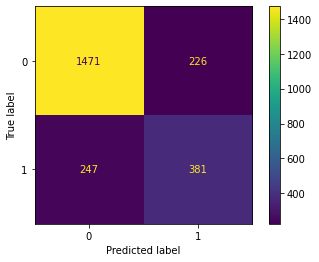

In [6]:
predict_model(X_test, y_test,model)